In [60]:
import matplotlib.pyplot as plt
import numpy as np
from functools import cmp_to_key

e = 1e-14

def LibDet3d(a,b,c):
    return np.linalg.det(np.array([[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]]))

def LibDet3dA(b,c): # a = (0,0)
    return np.linalg.det(np.array([[0,0,1],[b[0],b[1],1],[c[0],c[1],1]]))

def distToS(a): # S = (0,0)
    return (a[0]**2+a[1]**2)**0.5

def dist(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def graham(x,y):
    p = [(x[i],y[i],i) for i in range(len(x))]
    o = (float("inf"),float("inf"))
    for point in p:
        if o[1] > point[1] or (o[1] < point[1] and o[1] + e >= point[1] and o[0] > point[0]):
            o = point
    for i in range(len(p)):
        p[i] = (p[i][0]-o[0],p[i][1]-o[1],p[i][2])
    def compare(p1, p2):
        if p1 == (0,0):
            return -1
        elif p2 == (0,0):
            return 1
        elif LibDet3dA(p1,p2)>e:
            return -1
        elif LibDet3dA(p1,p2)<-e:
            return 1
        if distToS(p1) > distToS(p2):
            return 1
        return -1
    p.sort(key=cmp_to_key(compare))
    good = [True for _ in p]
    a = 0
    b = 1
    c = 2
    while(c < len(p)):
        if LibDet3d(p[a],p[c],p[b]) < -e:
            a = b
            b = c
            c += 1
        else:
            good[b]=False
            if a != 0:
                b = a
                a -= 1
                while not good[a] and a >= 0:
                    a -= 1
            else:
                b = c
                c += 1
    wyn = []
    for i in range(len(good)):
        if good[i]:
            wyn += [p[i][2]]
    return wyn
            
def jarvis(x, y):
    points = [(x[i],y[i],i) for i in range(len(x))]
    o = (float("inf"),float("inf"))
    for point in points:
        if o[1] > point[1] or (o[1] < point[1] and o[1] + e >= point[1] and o[0] > point[0]):
            o = point
    for i in range(len(points)):
        points[i] = (points[i][0]-o[0],points[i][1]-o[1],points[i][2])
    
    wyn = [o[2]]
    last = (0,0,o[2])
    while True:
        if last == points[0]:
            pom = points[1]
        else:
            pom = points[0]
        for p in points:
            if LibDet3d(last,p,pom) > e or (LibDet3d(last,p,pom) <= e and LibDet3d(last,p,pom) >= -e and dist(pom,last) < dist(p,last)):
                pom = p
        if pom[2] == o[2]:
            break
        wyn += [pom[2]]
        last = pom
    return wyn
        
        
        
        
def indexToNum(x,index):
    wyn = []
    for i in index:
        wyn += [x[i]]
    return wyn

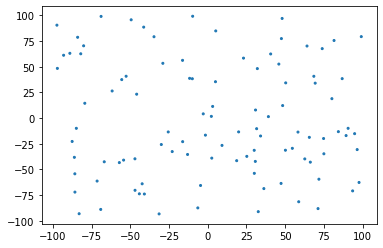

In [64]:
# zestaw a

l_a = -100 # zakresy przedziulu
p_a = 100  # [l, p]
n_a = 100  # liczba punktow

x_a = (p_a - l_a) * np.random.rand(n_a) + l_a
y_a = (p_a - l_a) * np.random.rand(n_a) + l_a

plt.scatter(x_a,y_a,[4] * n_a)

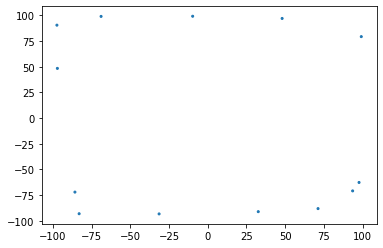

In [65]:
i_a = graham(x_a,y_a)

x_a2 = indexToNum(x_a,i_a)
y_a2 = indexToNum(y_a,i_a)

plt.scatter(x_a2,y_a2,[4] * len(x_a2))

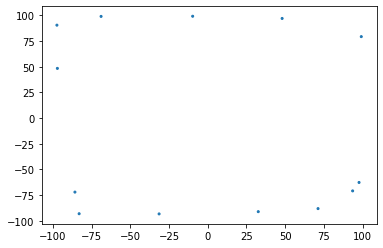

In [66]:
i_a1 = jarvis(x_a,y_a)

x_a1 = indexToNum(x_a,i_a1)
y_a1 = indexToNum(y_a,i_a1)

plt.scatter(x_a1,y_a1,[4] * len(x_a1))

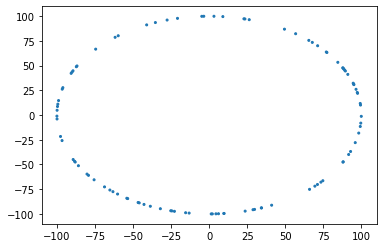

In [67]:
# zestaw b

s_b = (0,0) # srodek okregu
r_b = 100   # promien okregu
n_b = 100   # ilosc punktow

t_b = np.random.rand(n_b) * 2 * np.pi

x_b = [r_b*np.sin(X) + s_b[0] for X in t_b]
y_b = [r_b*np.cos(Y) + s_b[1] for Y in t_b]

plt.scatter(x_b,y_b,[4] * n_b)

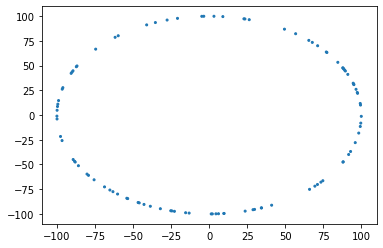

In [68]:
i_b = graham(x_b,y_b)

x_b = indexToNum(x_b,i_b)
y_b = indexToNum(y_b,i_b)

plt.scatter(x_b,y_b,[4] * len(x_b))

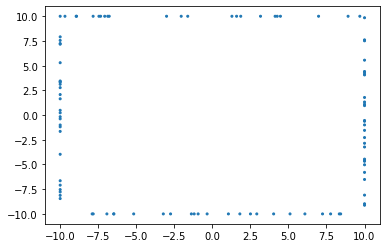

In [69]:
# zestaw c

a_c = (-10,-10) # lewy dolny rog prostokata
b_c = (10,10)   # prawy gorny rog prostokata
n_c = 100       # ilosc punktow

x_c = []
y_c = []
t_c = 2 * (b_c[0] - a_c[0] + b_c[1] - a_c[1]) * np.random.rand(n_c)
for t in t_c:
    if t <= b_c[1] - a_c[1]:
        x_c += [a_c[0]]
        y_c += [t + a_c[1]]
    elif t <= b_c[0] - a_c[0] + b_c[1] - a_c[1]:
        x_c += [(t - b_c[1] + a_c[1]) + a_c[0]]
        y_c += [b_c[1]]
    elif t <= b_c[0] - a_c[0] + 2 * (b_c[1] - a_c[1]):
        x_c += [b_c[0]]
        y_c +=[b_c[1] - (t - b_c[0] + a_c[0] - b_c[1] + a_c[1])]
    else:
        x_c += [(2 * (b_c[0] - a_c[0]) + 2 * (b_c[1] - a_c[1]) - t) + a_c[0]]
        y_c += [a_c[1]]

plt.scatter(x_c,y_c,[4] * n_c)

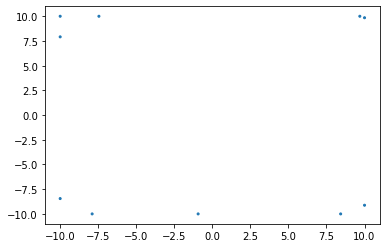

In [70]:
i_c = graham(x_c,y_c)

x_c = indexToNum(x_c,i_c)
y_c = indexToNum(y_c,i_c)

plt.scatter(x_c,y_c,[4] * len(x_c))

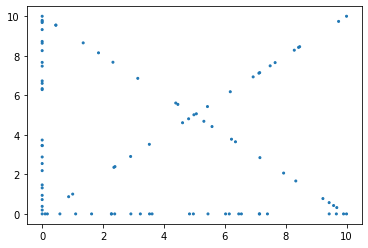

In [71]:
# zestaw d

a_d = (0,0)     # lewy dolny rog prostokata
b_d = (10,10)   # prawy gorny rog prostokata
n1_d = 25       # ilosc punktow na bokach
n2_d = 20       # ilosc punktow na przekatnych

x_d = [a_d[0],b_d[0],b_d[0],a_d[0]]
y_d = [a_d[1],a_d[1],b_d[1],b_d[1]]

x_d += [a_d[0]] * n1_d
y_d += ((b_d[1] - a_d[1]) * np.random.rand(n1_d) + a_d[1]).tolist()

x_d += ((b_d[0] - a_d[0]) * np.random.rand(n1_d) + a_d[0]).tolist()
y_d += [a_d[1]] * n1_d

t_d = (b_d[0] - a_d[0]) * np.random.rand(n2_d)
for t in t_d:
    x_d += [a_d[0] + t]
    y_d += [a_d[1] + t]

t_d = (b_d[0] - a_d[0]) * np.random.rand(n2_d)
for t in t_d:
    x_d += [a_d[0] + t]
    y_d += [b_d[1] - t]
    
plt.scatter(x_d,y_d,s = [4] * 2 * (n1_d + n2_d + 2))

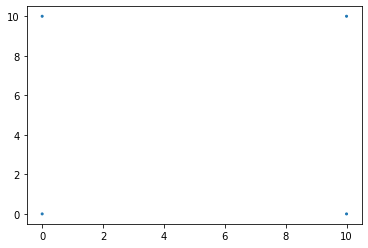

In [72]:
i_d = graham(x_d,y_d)

x_d = indexToNum(x_d,i_d)
y_d = indexToNum(y_d,i_d)

plt.scatter(x_d,y_d,[4] * len(x_d))